# Import Library

In [1]:
# import keras library
from keras import backend as KB

# create recall metric function
def recall_model_fruit(y_true_fruit, y_pred_fruit):
    true_positives_fruit = KB.sum(KB.round(KB.clip(y_true_fruit * y_pred_fruit, 0, 1)))
    possible_positives_fruit = KB.sum(KB.round(KB.clip(y_true_fruit, 0, 1)))
    recall_fruit = true_positives_fruit / (possible_positives_fruit + KB.epsilon())
    return recall_fruit

# create precision metric function
def precision_model_fruit(y_true_fruit, y_pred_fruit):
    true_positives_fruit = KB.sum(KB.round(KB.clip(y_true_fruit * y_pred_fruit, 0, 1)))
    predicted_positives_fruit = KB.sum(KB.round(KB.clip(y_pred_fruit, 0, 1)))
    precision_fruit = true_positives_fruit / (predicted_positives_fruit + KB.epsilon())
    return precision_fruit

# create f1-score metric function
def f1_model_fruit(y_true_fruit, y_pred_fruit):
    precision_fruit = precision_model_fruit(y_true_fruit, y_pred_fruit)
    recall_fruit = recall_model_fruit(y_true_fruit, y_pred_fruit)
    return 2*((precision_fruit*recall_fruit)/(precision_fruit+recall_fruit+KB.epsilon()))

In [2]:
import os
import pandas as pd
import numpy as np


import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import random
import cv2 as cv

from sklearn.metrics import confusion_matrix



# Import File

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [4]:
list_location_image_train = []
list_label_image_train = []

list_location_image_test = []
list_label_image_test = []

for file_detail in os.walk("/content/drive/MyDrive/kaggle/fruit_classification/data"):
  location_image = file_detail[0]
  name_image = file_detail[2]
  if location_image not in ["/content/drive/MyDrive/kaggle/fruit_classification/data", "/content/drive/MyDrive/kaggle/fruit_classification/data/test","/content/drive/MyDrive/kaggle/fruit_classification/data/train"]:
    for j in range(len(name_image)):
      # print(location_image + '/' + name_image[j])
      # print(name_image[j].split("_")[0])
      # print(location_image.split("/")[-2:-1])
      if location_image.split("/")[-2:-1][0] == 'train':
        list_location_image_train.append(location_image + '/' + name_image[j])
        list_label_image_train.append(name_image[j].split("_")[0])
      elif location_image.split("/")[-2:-1][0] == "test":
        list_location_image_test.append(location_image + '/' + name_image[j])
        # list_label_image_test.append(name_image[j].split("_")[0])
      else:
        print("check something else")



In [5]:
df_train = pd.DataFrame({'location_image': list_location_image_train,
                   'label': list_label_image_train})
# df_train = df_train[:1000]

In [6]:
df_test = pd.DataFrame({'location_image': list_location_image_test})
# df_test = df_test[:200]

# Data Visualization

In [7]:
# unique label in train
unique_class = df_train['label'].unique().tolist()
unique_class

['Blueberry',
 'Strawberry',
 'Kiwi',
 'Cherry',
 'Avocado',
 'Watermelon',
 'Mango',
 'Cactus fruit',
 'Apple Granny Smith',
 'Orange',
 'Banana',
 'Corn',
 'Apricot',
 'Pineapple']

<Axes: xlabel='label', ylabel='count'>

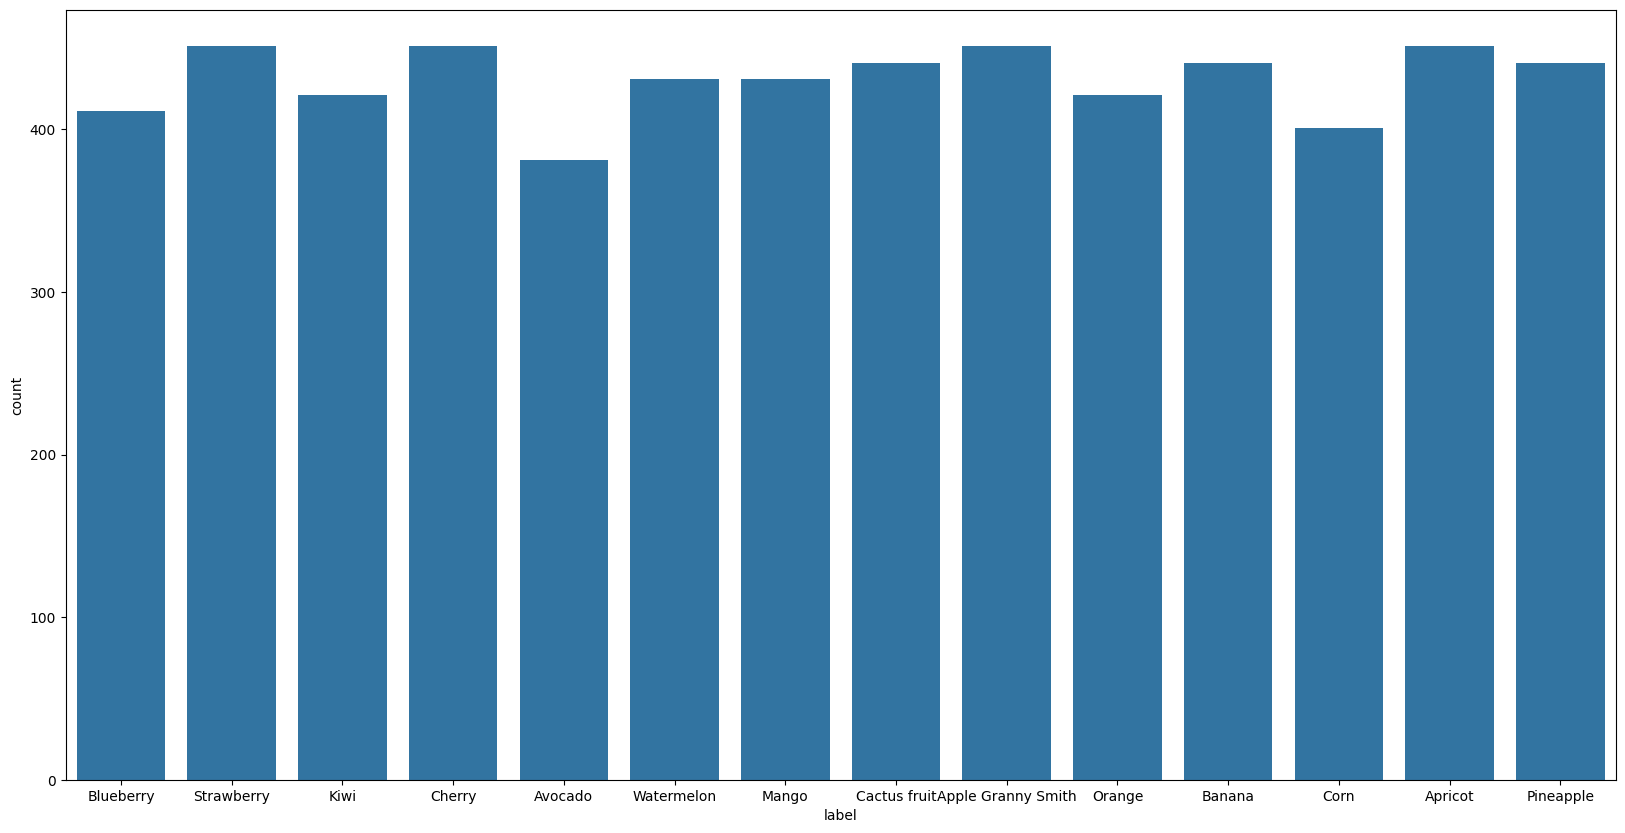

In [8]:
plt.figure(figsize = (20,10))
sns.countplot(df_train, x="label")

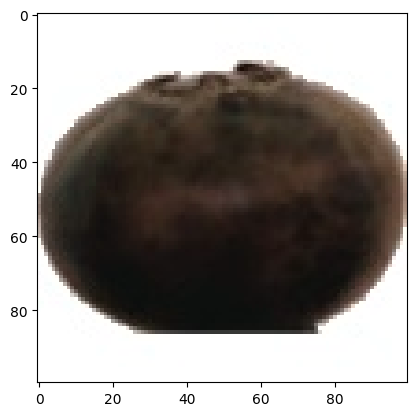

In [9]:
image_show = cv.imread("/content/drive/MyDrive/kaggle/fruit_classification/data/train/Blueberry/Blueberry_348.jpg")
plt.imshow(image_show)

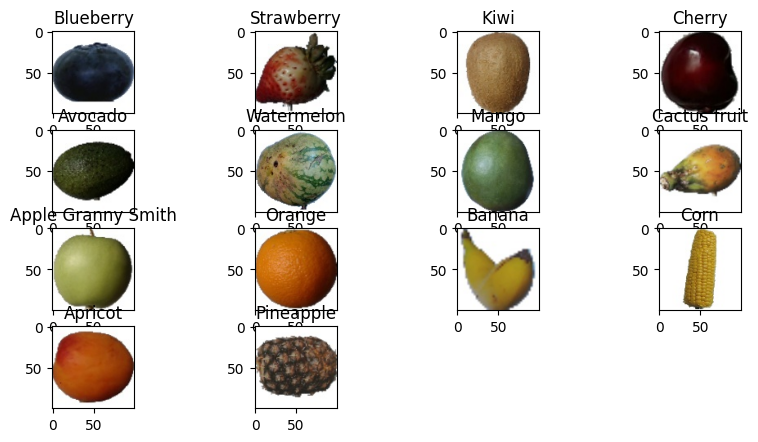

In [10]:
plt.figure(figsize = (10,10))
for i in range(len(unique_class)):
  plt.subplot(8,4,i+1)
  all_unique_image = df_train[df_train['label'] == unique_class[i]]
  test_image = mpimg.imread(all_unique_image[0:1]['location_image'].tolist()[0])

  plt.imshow(test_image)
  plt.title(unique_class[i])
  # plt.axis("off");
  # plt.axis("off");

  # print(test_image)
  # print()

# Feature Engineering

In [11]:
df_train[:10]

,location_image,label
0,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry
1,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry
2,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry
3,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry
4,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry
5,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry
6,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry
7,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry
8,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry
9,/content/drive/MyDrive/kaggle/fruit_classifica...,Blueberry


## Convert data to numpy

In [12]:
# convert train image to numpy

list_train_image = []
list_train_label = []
for i in range(len(df_train["location_image"])):
  location_train_image = df_train["location_image"][i]
  label_train_image = df_train["label"][i]

  list_train_image.append(img_to_array(load_img(location_train_image)))
  list_train_label.append(label_train_image)

numpy_train_image = np.array(list_train_image)
numpy_train_label = np.array(list_train_label)
print(numpy_train_image.shape,numpy_train_label.shape)

(6024, 100, 100, 3) (6024,)


In [13]:
# convert test image to numpy
list_test_image = []

for i in range(len(df_test["location_image"])):
  location_test_image = df_test["location_image"][i]
  list_test_image.append(img_to_array(load_img(location_test_image)))

numpy_test_image = np.array(list_test_image)

print(numpy_test_image.shape)

(663, 100, 100, 3)


## One-hot encoding

In [14]:
list_unique = df_train["label"].unique().tolist()
list_unique

['Blueberry',
 'Strawberry',
 'Kiwi',
 'Cherry',
 'Avocado',
 'Watermelon',
 'Mango',
 'Cactus fruit',
 'Apple Granny Smith',
 'Orange',
 'Banana',
 'Corn',
 'Apricot',
 'Pineapple']

In [15]:
dict_list_unique = {}
for i in range(len(list_unique)):

  dict_list_unique[list_unique[i]] = i
dict_list_unique


{'Blueberry': 0,
 'Strawberry': 1,
 'Kiwi': 2,
 'Cherry': 3,
 'Avocado': 4,
 'Watermelon': 5,
 'Mango': 6,
 'Cactus fruit': 7,
 'Apple Granny Smith': 8,
 'Orange': 9,
 'Banana': 10,
 'Corn': 11,
 'Apricot': 12,
 'Pineapple': 13}

In [16]:
list_unique_label = []
for i in range(len(df_train['label'])):
  list_unique_label.append(dict_list_unique[df_train['label'][i]])
# list_unique_label
# df_train['label'] = list_unique_label
# df_train

In [17]:
label_category = tf.keras.utils.to_categorical(list_unique_label, num_classes=len(list_unique), dtype='uint8')
label_category

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# Train test validation

In [18]:
train_feature, validation_feature, train_label, validation_label = train_test_split(numpy_train_image, label_category, test_size = 0.20, random_state = 7)
train_feature.shape, validation_feature.shape, train_label.shape, validation_label.shape

((4819, 100, 100, 3), (1205, 100, 100, 3), (4819, 14), (1205, 14))

In [19]:
train_tf = tf.data.Dataset.from_tensor_slices((train_feature,train_label))
validation_tf = tf.data.Dataset.from_tensor_slices((validation_feature, validation_label))
test_tf = tf.data.Dataset.from_tensor_slices(numpy_test_image)
len(train_tf),len(validation_tf),len(test_tf)

(4819, 1205, 663)

# Rescale and augmenation

In [20]:
data_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(1/255.)])

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  # tf.keras.layers.RandomBrightness(0.1),
  # tf.keras.layers.RandomContrast(0.1),
  # tf.keras.layers.RandomRotation(0.1),
])
BATCH_SIZE = 128

In [21]:

train_tf = train_tf.map(lambda i, j: (data_rescale(i), j), num_parallel_calls=tf.data.AUTOTUNE)
train_tf = train_tf.shuffle(1000)
train_tf = train_tf.batch(BATCH_SIZE)
train_tf = train_tf.map(lambda i, j: (data_augmentation(i, training=True), j), num_parallel_calls=tf.data.AUTOTUNE)
train_tf = train_tf.prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
validation_tf = validation_tf.map(lambda i, j: (data_rescale(i), j), num_parallel_calls=tf.data.AUTOTUNE)
validation_tf = validation_tf.batch(BATCH_SIZE)
validation_tf = validation_tf.prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
test_tf = test_tf.map(lambda i: (data_rescale(i)), num_parallel_calls=tf.data.AUTOTUNE)
# test_tf = test_tf.map(lambda i, j: (data_rescale(i), j), num_parallel_calls=tf.data.AUTOTUNE)

# test_tf = test_tf.map(lambda i, j: (data_rescale(i), j), num_parallel_calls=tf.data.AUTOTUNE)
test_tf = test_tf.batch(BATCH_SIZE)
test_tf = test_tf.prefetch(buffer_size=tf.data.AUTOTUNE)


# ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)

# Train_model

In [24]:

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=7, strides = 1, kernel_size = 5, padding = "same", activation = "relu", input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(strides = 2, padding = "same"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(unique_class), activation="softmax")
])
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(),loss="categorical_crossentropy",metrics = ['accuracy', f1_model_fruit, recall_model_fruit, precision_model_fruit])



cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 7)       532       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 7)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 14)                245014    
                                                                 
Total params: 245546 (959.16 KB)
Trainable params: 245546 (959.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
EPOCHS = 10

cnn_history = cnn_model.fit(train_tf,epochs =EPOCHS, validation_data= validation_tf)

Epoch 1/10
38/38 [==============================] - 35s 879ms/step - loss: 1.3516 - accuracy: 0.6306 - f1_model_fruit: 0.4458 - recall_model_fruit: 0.3836 - precision_model_fruit: 0.7050 - val_loss: 0.2458 - val_accuracy: 0.9328 - val_f1_model_fruit: 0.9461 - val_recall_model_fruit: 0.9104 - val_precision_model_fruit: 0.9850
Epoch 2/10
38/38 [==============================] - 34s 904ms/step - loss: 0.0872 - accuracy: 0.9797 - f1_model_fruit: 0.9808 - recall_model_fruit: 0.9725 - precision_model_fruit: 0.9894 - val_loss: 0.0849 - val_accuracy: 0.9793 - val_f1_model_fruit: 0.9811 - val_recall_model_fruit: 0.9766 - val_precision_model_fruit: 0.9858
Epoch 3/10
38/38 [==============================] - 38s 982ms/step - loss: 0.0267 - accuracy: 0.9965 - f1_model_fruit: 0.9960 - recall_model_fruit: 0.9954 - precision_model_fruit: 0.9967 - val_loss: 0.0192 - val_accuracy: 0.9992 - val_f1_model_fruit: 0.9980 - val_recall_model_fruit: 0.9961 - val_precision_model_fruit: 1.0000
Epoch 4/10
38/38 [=

# Evaluation

In [26]:
# cnn_model.evaluate(validation_tf)
score_metric = cnn_model.evaluate(validation_tf)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

10/10 [==============================] - 3s 275ms/step - loss: 0.0027 - accuracy: 1.0000 - f1_model_fruit: 1.0000 - recall_model_fruit: 1.0000 - precision_model_fruit: 1.0000
[0.002650255337357521, 1.0, 1.0, 1.0, 1.0]
test_loss: 0.002650255337357521
test_accuracy: 1.0
test_f1: 1.0
test_precision: 1.0
test_recall: 1.0


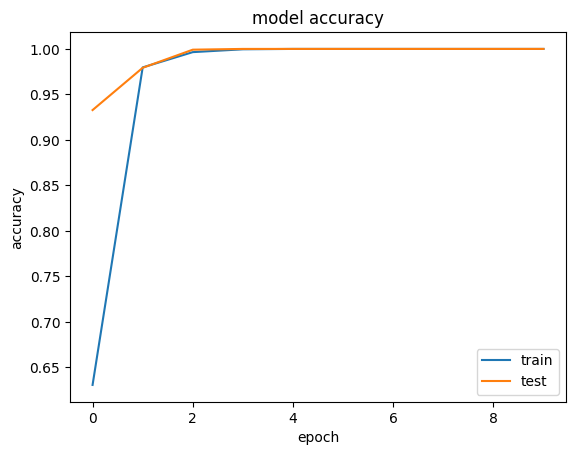

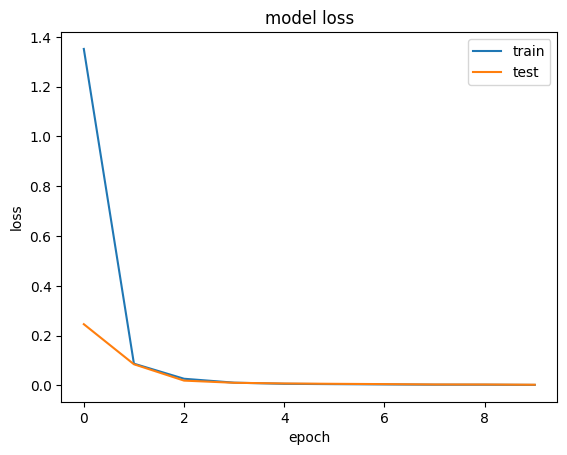

In [27]:
# summarize history for accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Predict validation

In [28]:
y_prediction_validation = cnn_model.predict(validation_tf)
y_prediction_validation

10/10 [==============================] - 4s 390ms/step


array([[3.54875463e-29, 7.70847362e-12, 3.91851017e-06, ...,
        2.05416981e-08, 1.65362857e-04, 8.26043314e-12],
       [6.75790216e-06, 7.12811161e-05, 4.32710948e-07, ...,
        1.61798166e-08, 1.64032244e-07, 9.99724865e-01],
       [7.51286488e-22, 1.05255962e-12, 3.06241252e-12, ...,
        9.99873877e-01, 3.85241470e-17, 1.47737780e-10],
       ...,
       [3.82034195e-04, 7.81212577e-07, 6.35467503e-12, ...,
        6.37729036e-10, 7.01550645e-16, 4.83013864e-04],
       [9.18556168e-07, 1.07410080e-04, 2.99820294e-06, ...,
        4.66815919e-08, 2.40948657e-06, 9.99543607e-01],
       [6.06432238e-08, 9.99608576e-01, 3.92389666e-07, ...,
        3.56720591e-07, 1.05405525e-10, 3.70524533e-04]], dtype=float32)

In [29]:
y_prediction_validation.shape

(1205, 14)

## convert predict numpy to predict one hot

In [30]:
y_prediction_validation = tf.argmax(y_prediction_validation, axis=1)
y_validation = np.argmax(validation_label,axis=1)
y_prediction_validation, y_validation, y_prediction_validation.shape, y_validation.shape

(<tf.Tensor: shape=(1205,), dtype=int64, numpy=array([ 9, 13, 11, ...,  5, 13,  1])>,
 array([ 9, 13, 11, ...,  5, 13,  1]),
 TensorShape([1205]),
 (1205,))

<Axes: >

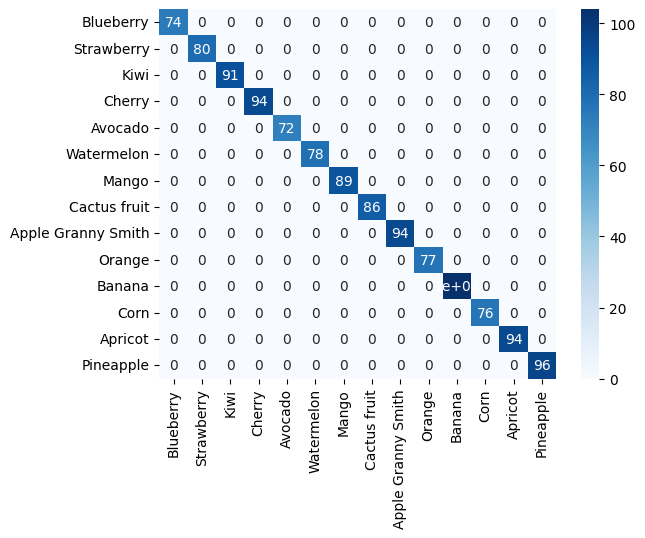

In [31]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_validation, y_prediction_validation), index= unique_class, columns = unique_class), cmap="Blues", annot = True)

# Predict test

In [32]:
y_prediction_test = cnn_model.predict(test_tf)
y_prediction_test

6/6 [==============================] - 1s 204ms/step


array([[6.81373361e-11, 9.99937475e-01, 1.86798734e-05, ...,
        1.14518794e-08, 7.45290026e-06, 2.89536201e-05],
       [1.60900928e-08, 9.99968112e-01, 3.41525038e-06, ...,
        1.69954001e-06, 3.62773950e-10, 2.32262501e-05],
       [1.18063725e-10, 9.99961793e-01, 7.84666327e-07, ...,
        8.03328106e-08, 6.32243555e-08, 3.72105424e-05],
       ...,
       [8.65532418e-14, 1.62748393e-06, 2.23872419e-07, ...,
        2.51612975e-03, 4.16679061e-12, 8.91307718e-06],
       [1.21486113e-15, 4.54514186e-08, 4.00817712e-11, ...,
        3.53049109e-04, 1.90613081e-18, 6.50477505e-10],
       [8.19111671e-16, 3.47552515e-07, 8.70451988e-10, ...,
        4.09013475e-04, 6.94937395e-17, 7.76535614e-10]], dtype=float32)

In [33]:
y_prediction_test = tf.argmax(y_prediction_test, axis=1)

In [34]:
list_predict_test = tf.keras.backend.eval(y_prediction_test).tolist()
# list_predict_test

In [35]:
dict_list_unique = {}
for i in range(len(list_unique)):

  dict_list_unique[list_unique[i]] = i
dict_list_unique

{'Blueberry': 0,
 'Strawberry': 1,
 'Kiwi': 2,
 'Cherry': 3,
 'Avocado': 4,
 'Watermelon': 5,
 'Mango': 6,
 'Cactus fruit': 7,
 'Apple Granny Smith': 8,
 'Orange': 9,
 'Banana': 10,
 'Corn': 11,
 'Apricot': 12,
 'Pineapple': 13}

In [36]:
reversed_dict = {}
for key, value in dict_list_unique.items():
    reversed_dict[value] = key

reversed_dict


{0: 'Blueberry',
 1: 'Strawberry',
 2: 'Kiwi',
 3: 'Cherry',
 4: 'Avocado',
 5: 'Watermelon',
 6: 'Mango',
 7: 'Cactus fruit',
 8: 'Apple Granny Smith',
 9: 'Orange',
 10: 'Banana',
 11: 'Corn',
 12: 'Apricot',
 13: 'Pineapple'}

In [37]:
list_predict_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,

In [38]:
reversed_dict[list_predict_test[0]]

'Strawberry'

In [39]:
list_answer_label = []
for i in range(len(list_predict_test)):
  list_answer_label.append(reversed_dict[list_predict_test[i]])
# list_answer_label

In [40]:
df_test_compare = df_test
df_test_compare

,location_image
0,/content/drive/MyDrive/kaggle/fruit_classifica...
1,/content/drive/MyDrive/kaggle/fruit_classifica...
2,/content/drive/MyDrive/kaggle/fruit_classifica...
3,/content/drive/MyDrive/kaggle/fruit_classifica...
4,/content/drive/MyDrive/kaggle/fruit_classifica...
...,...
658,/content/drive/MyDrive/kaggle/fruit_classifica...
659,/content/drive/MyDrive/kaggle/fruit_classifica...
660,/content/drive/MyDrive/kaggle/fruit_classifica...
661,/content/drive/MyDrive/kaggle/fruit_classifica...


In [41]:
df_test_compare['real_answer'] = df_test_compare['location_image'].map(lambda x : x.split('/')[-2:-1][0])
df_test_compare['predict_answer'] = list_answer_label
df_test_compare
# df_test_compare['location_image'][0].split('/')[-2:-1][0]

,location_image,real_answer,predict_answer
0,/content/drive/MyDrive/kaggle/fruit_classifica...,Strawberry,Strawberry
1,/content/drive/MyDrive/kaggle/fruit_classifica...,Strawberry,Strawberry
2,/content/drive/MyDrive/kaggle/fruit_classifica...,Strawberry,Strawberry
3,/content/drive/MyDrive/kaggle/fruit_classifica...,Strawberry,Strawberry
4,/content/drive/MyDrive/kaggle/fruit_classifica...,Strawberry,Strawberry
...,...,...,...
658,/content/drive/MyDrive/kaggle/fruit_classifica...,Cactus fruit,Cactus fruit
659,/content/drive/MyDrive/kaggle/fruit_classifica...,Cactus fruit,Cactus fruit
660,/content/drive/MyDrive/kaggle/fruit_classifica...,Cactus fruit,Cactus fruit
661,/content/drive/MyDrive/kaggle/fruit_classifica...,Cactus fruit,Cactus fruit


In [42]:
# calculate accuracy in real world
temp_var = 0
for i in range(len(df_test_compare)):
  if df_test_compare['real_answer'][i] == df_test_compare['predict_answer'][i]:
    temp_var = temp_var + 1
temp_var
print("Accuracy = ",temp_var/len(df_test_compare)*100)

Accuracy =  99.84917043740573


# Export File

In [43]:
#location#
# df.to_csv()

# Other Parameter

In [44]:

def train_model(EPOCHS, cnn_model):
  cnn_history = cnn_model.fit(train_tf,epochs =EPOCHS, validation_data= validation_tf)

  score_metric = cnn_model.evaluate(validation_tf)
  print(score_metric)
  print('test_loss:', score_metric[0])
  print('test_accuracy:', score_metric[1])
  print('test_f1:', score_metric[2])
  print('test_precision:', score_metric[3])
  print('test_recall:', score_metric[4])

  # summarize history for accuracy
  plt.plot(cnn_history.history['accuracy'])
  plt.plot(cnn_history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()
  # summarize history for loss
  plt.plot(cnn_history.history['loss'])
  plt.plot(cnn_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

  y_prediction_validation = cnn_model.predict(validation_tf)

  y_prediction_validation = tf.argmax(y_prediction_validation, axis=1)
  y_validation = np.argmax(validation_label,axis=1)
  y_prediction_validation, y_validation, y_prediction_validation.shape, y_validation.shape

  sns.heatmap(pd.DataFrame(confusion_matrix(y_validation, y_prediction_validation), index= unique_class, columns = unique_class), cmap="Blues", annot = True)

  y_prediction_test = cnn_model.predict(test_tf)


  y_prediction_test = tf.argmax(y_prediction_test, axis=1)

  list_predict_test = tf.keras.backend.eval(y_prediction_test).tolist()


  dict_list_unique = {}
  for i in range(len(list_unique)):

    dict_list_unique[list_unique[i]] = i
  dict_list_unique

  reversed_dict = {}
  for key, value in dict_list_unique.items():
      reversed_dict[value] = key


  list_answer_label = []
  for i in range(len(list_predict_test)):
    list_answer_label.append(reversed_dict[list_predict_test[i]])
  # list_answer_label

  df_test_compare = df_test
  df_test_compare

  df_test_compare['real_answer'] = df_test_compare['location_image'].map(lambda x : x.split('/')[-2:-1][0])
  df_test_compare['predict_answer'] = list_answer_label
  df_test_compare
  # df_test_compare['location_image'][0].split('/')[-2:-1][0]

  # calculate accuracy in real world
  temp_var = 0
  for i in range(len(df_test_compare)):
    if df_test_compare['real_answer'][i] == df_test_compare['predict_answer'][i]:
      temp_var = temp_var + 1

  return "Accuracy = ",temp_var/len(df_test_compare)*100

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 3)       39        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 3)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 7500)              0         
                                                                 
 dense_3 (Dense)             (None, 14)                105014    
                                                                 
Total params: 105053 (410.36 KB)
Trainable params: 105053 (410.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
38/38 [==============================] - 18s 422ms/step - loss: 1.976

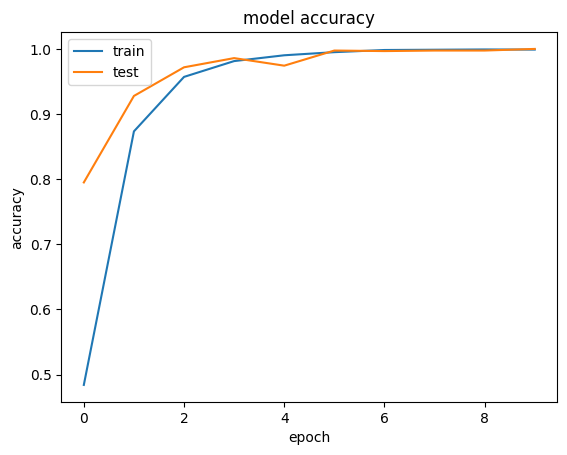

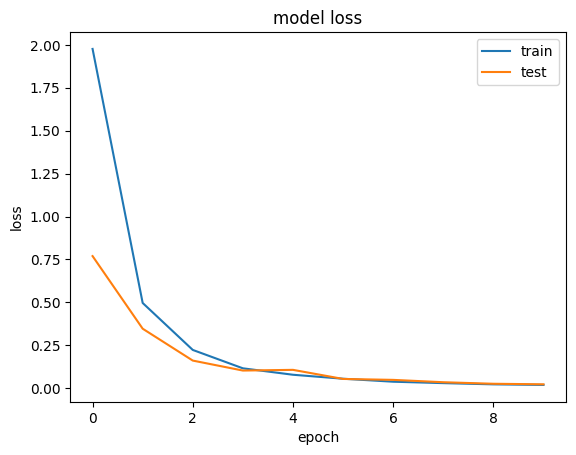

6/6 [==============================] - 1s 115ms/step
('Accuracy = ', 99.69834087481146)


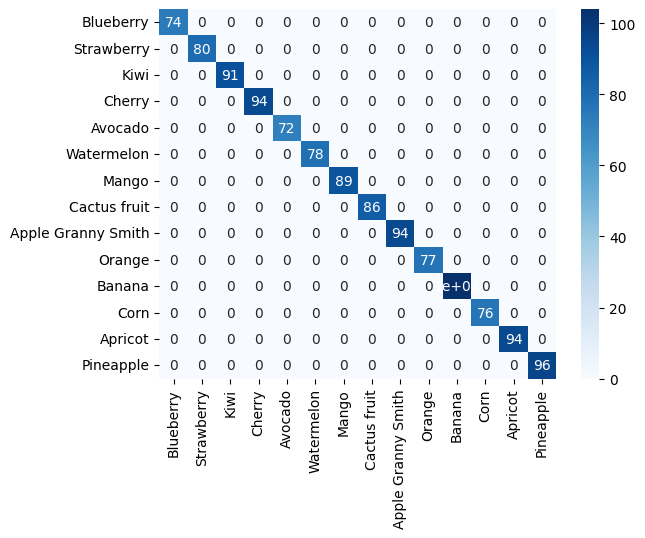

In [55]:
EPOCHS = 10
cnn_model_parameter_one = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=3, strides = 1, kernel_size = 2, padding = "same", activation = "relu", input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(strides = 2, padding = "valid"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(unique_class), activation="softmax")
])
cnn_model_parameter_one.compile(optimizer = tf.keras.optimizers.Adam(),loss="categorical_crossentropy",metrics = ['accuracy', f1_model_fruit, recall_model_fruit, precision_model_fruit])
cnn_model_parameter_one.summary()

model_result_1 = train_model(EPOCHS, cnn_model_parameter_one)
print(model_result_1)

In [56]:
print(model_result_1)

('Accuracy = ', 99.69834087481146)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 4)         112       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 4)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2500)              0         
                                                                 
 dense_4 (Dense)             (None, 14)                35014     
                                                                 
Total params: 35126 (137.21 KB)
Trainable params: 35126 (137.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
38/38 [==============================] - 11s 257ms/step - loss: 1.6473 

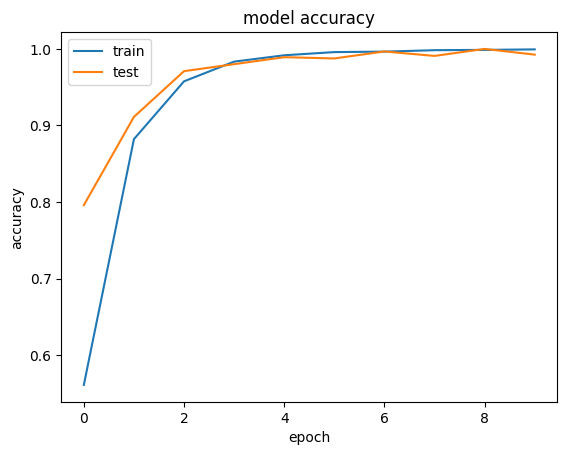

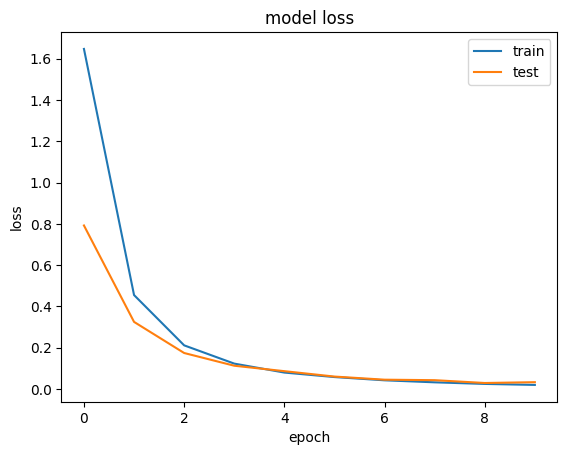

6/6 [==============================] - 0s 51ms/step
('Accuracy = ', 99.5475113122172)


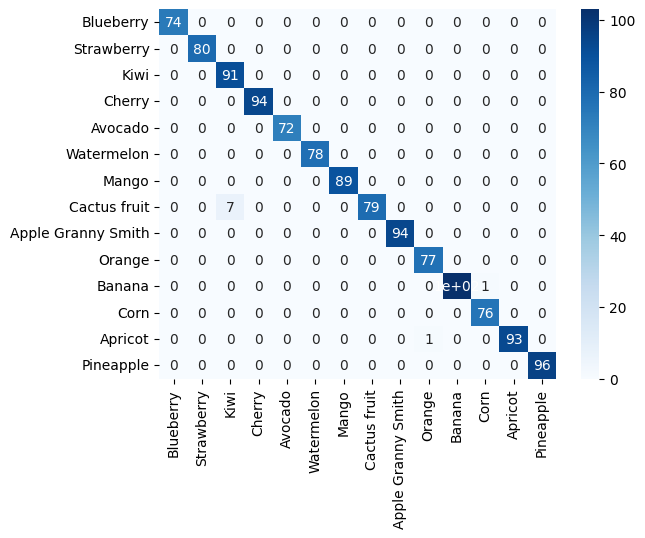

In [57]:
EPOCHS = 10
cnn_model_parameter_two = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=4, strides = 2, kernel_size = 3, padding = "same", activation = "relu", input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(strides = 2, padding = "same"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(unique_class), activation="softmax")
])
cnn_model_parameter_two.compile(optimizer = tf.keras.optimizers.Adam(),loss="categorical_crossentropy",metrics = ['accuracy', f1_model_fruit, recall_model_fruit, precision_model_fruit])
cnn_model_parameter_two.summary()

model_result_2 = train_model(EPOCHS, cnn_model_parameter_two)
print(model_result_2)

In [58]:
print(model_result_2)

('Accuracy = ', 99.5475113122172)


# compare dataset

In [65]:
df_compare_parameter = pd.DataFrame({'model': ['first_model', 'second_model', 'third_model'],
                                     'loss': [0.002650255337357521*100, 0.022795554250478745*100, 0.03296720236539841*100],
                                     'validation_accuracy': [1.0*100, 1.0*100, 0.9925311207771301*100],
                                     'f1_score': [1.0*100, 0.9988235235214233*100, 0.9952818155288696*100],
                                     'recall': [1.0*100, 1.0*100, 0.9984251856803894*100],
                                     'precision': [1.0*100, 0.9976562261581421*100, 0.9921875*100],
                                     'test_accuracy': [99.84917043740573,99.69834087481146,99.5475113122172]

})
df_compare_parameter

# first_model
# test_loss: 0.002650255337357521
# validation_accuracy: 1.0
# test_f1: 1.0
# test_precision: 1.0
# test_recall: 1.0
# test_accuracy: 99.84917043740573
# tf.keras.layers.Conv2D(filters=7, strides = 1, kernel_size = 5, padding = "same", activation = "relu", input_shape = (100,100,3)),
# tf.keras.layers.MaxPool2D(strides = 2, padding = "same"),


# second_model
# test_loss: 0.022795554250478745
# validation_accuracy: 1.0
# test_f1: 0.9988235235214233
# test_precision: 0.9976562261581421
# test_recall: 1.0
# test_accuracy: 99.69834087481146
# tf.keras.layers.Conv2D(filters=3, strides = 1, kernel_size = 2, padding = "same", activation = "relu", input_shape = (100,100,3)),
# tf.keras.layers.MaxPool2D(strides = 2, padding = "valid"),


# third model
# test_loss: 0.03296720236539841
# validation_accuracy: 0.9925311207771301
# test_f1: 0.9952818155288696
# test_precision: 0.9921875
# test_recall: 0.9984251856803894
# test_accuracy: 99.5475113122172
# tf.keras.layers.Conv2D(filters=4, strides = 2, kernel_size = 3, padding = "same", activation = "relu", input_shape = (100,100,3)),
# tf.keras.layers.MaxPool2D(strides = 2, padding = "same"),

,model,loss,validation_accuracy,f1_score,recall,precision,test_accuracy
0,first_model,0.265026,100.000000,100.000000,100.000000,100.000000,99.849170
1,second_model,2.279555,100.000000,99.882352,100.000000,99.765623,99.698341
2,third_model,3.296720,99.253112,99.528182,99.842519,99.218750,99.547511


<Axes: xlabel='model', ylabel='loss'>

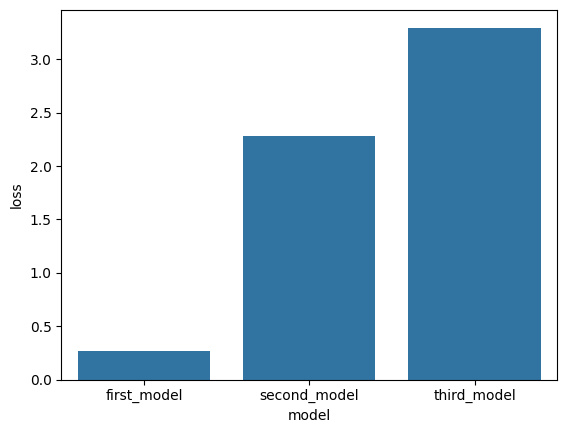

In [66]:
sns.barplot(df_compare_parameter, x="model", y="loss")


<Axes: xlabel='model', ylabel='validation_accuracy'>

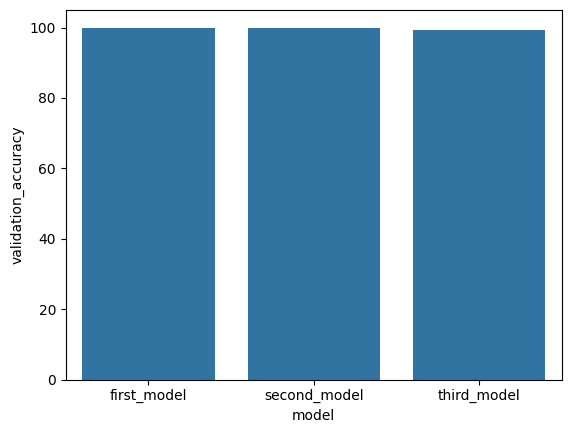

In [67]:
sns.barplot(df_compare_parameter, x="model", y="validation_accuracy")


<Axes: xlabel='model', ylabel='recall'>

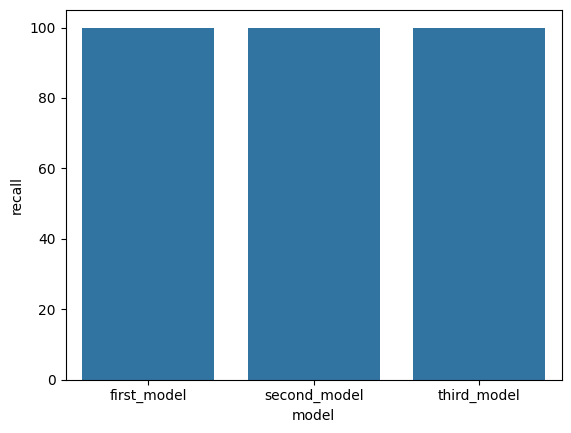

In [68]:
sns.barplot(df_compare_parameter, x="model", y="recall")


<Axes: xlabel='model', ylabel='precision'>

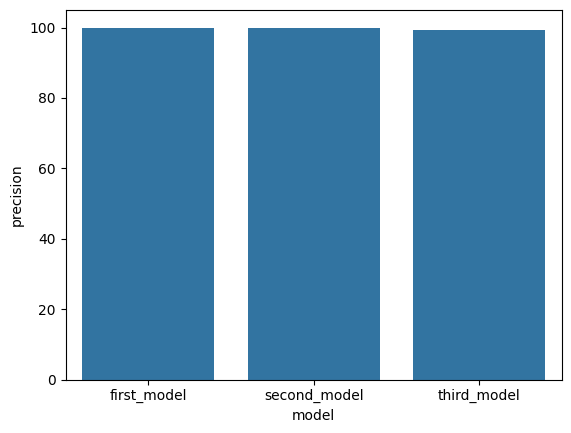

In [69]:
sns.barplot(df_compare_parameter, x="model", y="precision")


<Axes: xlabel='model', ylabel='test_accuracy'>

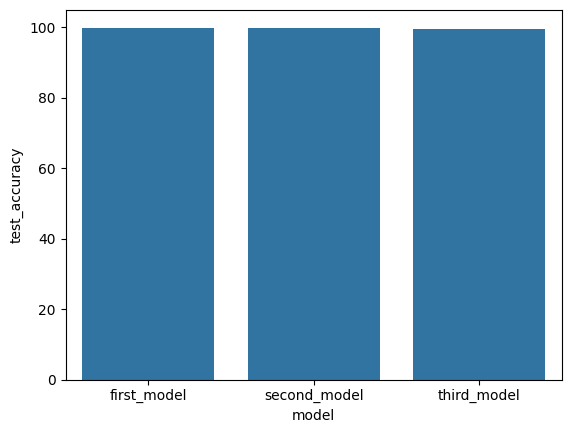

In [70]:
sns.barplot(df_compare_parameter, x="model", y="test_accuracy")
